### Import Libraries

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore', message='X does not have valid feature names')

## Data Preparation

In [208]:
#Load data from CSV
df = pd.read_csv('Airline_Delay_Cause.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,2,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",78.0,9.0,5.52,0.52,...,0.00,0.12,0.0,0.0,733.0,578.0,16.0,102.0,0.0,37.0
1,2025,2,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",78.0,12.0,5.77,1.62,...,0.00,2.86,0.0,0.0,803.0,379.0,75.0,92.0,0.0,257.0
2,2025,2,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",91.0,13.0,2.47,0.93,...,0.00,5.35,0.0,0.0,964.0,101.0,507.0,197.0,0.0,159.0
3,2025,2,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",56.0,12.0,4.34,0.34,...,0.00,2.00,2.0,1.0,761.0,246.0,35.0,239.0,0.0,241.0
4,2025,2,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2700.0,416.0,83.87,16.73,...,0.16,171.98,24.0,3.0,33668.0,10723.0,1790.0,6851.0,15.0,14289.0


In [209]:
#Checking column and dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71995 entries, 0 to 71994
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 71995 non-null  int64  
 1   month                71995 non-null  int64  
 2   carrier              71995 non-null  object 
 3   carrier_name         71995 non-null  object 
 4   airport              71995 non-null  object 
 5   airport_name         71995 non-null  object 
 6   arr_flights          71915 non-null  float64
 7   arr_del15            71885 non-null  float64
 8   carrier_ct           71915 non-null  float64
 9   weather_ct           71915 non-null  float64
 10  nas_ct               71915 non-null  float64
 11  security_ct          71915 non-null  float64
 12  late_aircraft_ct     71915 non-null  float64
 13  arr_cancelled        71915 non-null  float64
 14  arr_diverted         71915 non-null  float64
 15  arr_delay            71915 non-null 

### Data Cleaning

In [213]:
#Select column that are going to be used for classification analysis
df_cleaned = df[['year', 'month', 'carrier', 'airport', 'arr_flights', 'carrier_delay',
    'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'arr_del15']]
df_cleaned.head()

,year,month,carrier,airport,arr_flights,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_del15
0,2025,2,9E,ABE,78.0,578.0,16.0,102.0,0.0,37.0,9.0
1,2025,2,9E,AEX,78.0,379.0,75.0,92.0,0.0,257.0,12.0
2,2025,2,9E,AGS,91.0,101.0,507.0,197.0,0.0,159.0,13.0
3,2025,2,9E,ALB,56.0,246.0,35.0,239.0,0.0,241.0,12.0
4,2025,2,9E,ATL,2700.0,10723.0,1790.0,6851.0,15.0,14289.0,416.0


In [215]:
#Checking null value
df_cleaned.isna().sum()

year                     0
month                    0
carrier                  0
airport                  0
arr_flights             80
carrier_delay           80
weather_delay           80
nas_delay               80
security_delay          80
late_aircraft_delay     80
arr_del15              110
dtype: int64

In [217]:
#Dropping rows which have null value
df_cleaned = df_cleaned.dropna()
df_cleaned.isna().sum()

year                   0
month                  0
carrier                0
airport                0
arr_flights            0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
arr_del15              0
dtype: int64

In [219]:
#Check for duplicate row
df_cleaned.duplicated().sum()

0

In [235]:
#Creating column isDelayed as a target analysis
#The isDelayed column is created by checking whether the delay ratio (the proportion of delayed flights out of total flights) is greater than 15%.
df_cleaned['isDelayed'] = ((df_cleaned['arr_del15'] / df_cleaned['arr_flights']) > 0.15).astype(int)

### Encoding

In [240]:
# One-hot encode categorical columns
df_classification = pd.get_dummies(df_cleaned, columns=['carrier', 'airport'], drop_first=True)
df_classification.head()

,year,month,arr_flights,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_del15,isDelayed,...,airport_VEL,airport_VLD,airport_VPS,airport_WRG,airport_WYS,airport_XNA,airport_XWA,airport_YAK,airport_YKM,airport_YUM
0,2025,2,78.0,578.0,16.0,102.0,0.0,37.0,9.0,0,...,False,False,False,False,False,False,False,False,False,False
1,2025,2,78.0,379.0,75.0,92.0,0.0,257.0,12.0,1,...,False,False,False,False,False,False,False,False,False,False
2,2025,2,91.0,101.0,507.0,197.0,0.0,159.0,13.0,0,...,False,False,False,False,False,False,False,False,False,False
3,2025,2,56.0,246.0,35.0,239.0,0.0,241.0,12.0,1,...,False,False,False,False,False,False,False,False,False,False
4,2025,2,2700.0,10723.0,1790.0,6851.0,15.0,14289.0,416.0,1,...,False,False,False,False,False,False,False,False,False,False


In [242]:
#Assign predictors and target variable
X = df_classification.drop(columns=['arr_del15', 'isDelayed']).values
y = df_classification['isDelayed'].values

### Feature Scaling

In [256]:
from sklearn.preprocessing import StandardScaler

#Identify numerical features to scale
numerical_cols = ['year', 'month', 'arr_flights', 'carrier_delay', 'weather_delay', 
                  'nas_delay', 'security_delay', 'late_aircraft_delay']

#Initialize and apply scaler
X_num = df_classification[numerical_cols]
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

#Get the encoded categorical features and join it with the scaled numerical features
X_cat = df_classification.drop(columns=numerical_cols + ['arr_del15', 'isDelayed'])
X = np.hstack((X_num_scaled, X_cat.values))

## Exploratory Data Analysis

### Distribution of Delayed vs. Not Delayed Flights

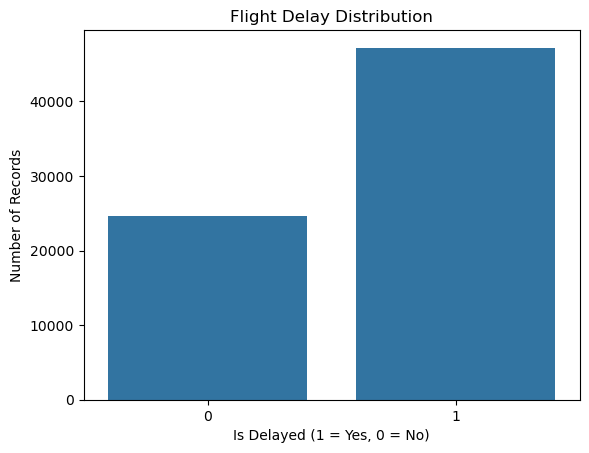

In [265]:
#Distribution of Delayed vs. Not Delayed Flights
sns.countplot(x='isDelayed', data=df_classification)
plt.title('Flight Delay Distribution')
plt.xlabel('Is Delayed (1 = Yes, 0 = No)')
plt.ylabel('Number of Records')
plt.show()

We visualized the distribution of the target variable isDelayed which indicates whether flights experienced delays longer than 15 minutes. We choose to visualize this target variable because this helps us understand the balance of the dataset. A significant imbalance could bias the classification model, leading it to favor the majority class. The distribution plot shows that a larger number of flights in the dataset are delayed (isDelayed = 1) compared to those that are not delayed (isDelayed = 0). This indicates a moderate class imbalance, where the delayed class is the majority.

### Average Delay Causes by Delay Status

<Figure size 800x500 with 0 Axes>

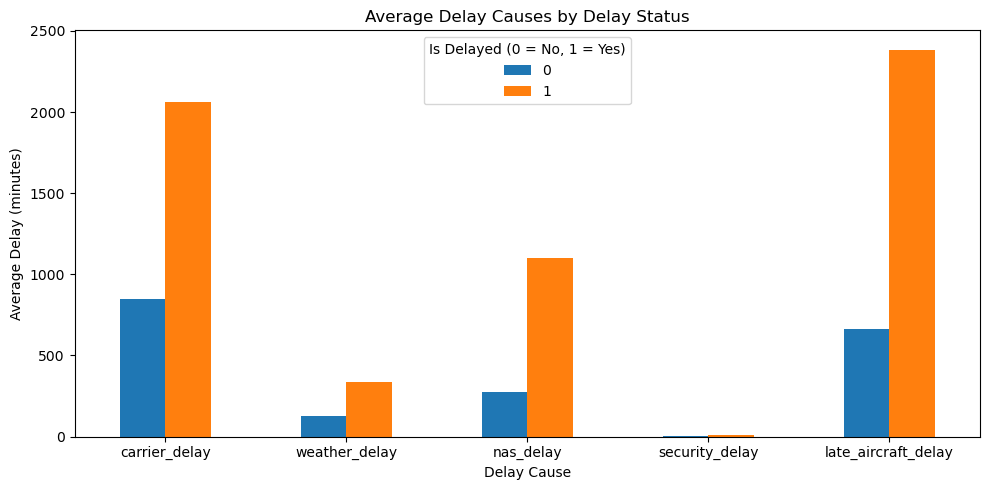

In [285]:
#Average Delay Causes by Delay Status
#Calculate the average of delay causes for each isDelayed
delay_causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
avg_delay_by_status = df_classification.groupby('isDelayed')[delay_causes].mean().T

#Create barplot
plt.figure(figsize=(8, 5))
avg_delay_by_status.plot(kind='bar', figsize=(10,5))
plt.title('Average Delay Causes by Delay Status')
plt.xlabel('Delay Cause')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=360)
plt.legend(title='Is Delayed (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

We chose to visualize the delay causes features because it is essential for identifying which variable contribute the most to the delayed flights. The bar plot shows the average number of minutes of different types of delays for flights that were delayed (isDelayed = 1) versus those that were not delayed (isDelayed = 0). This result confirms that carrier delays and late aircraft delays are major contributors to flights being classified as delayed.

### Correlation Heatmap for Numerical Features

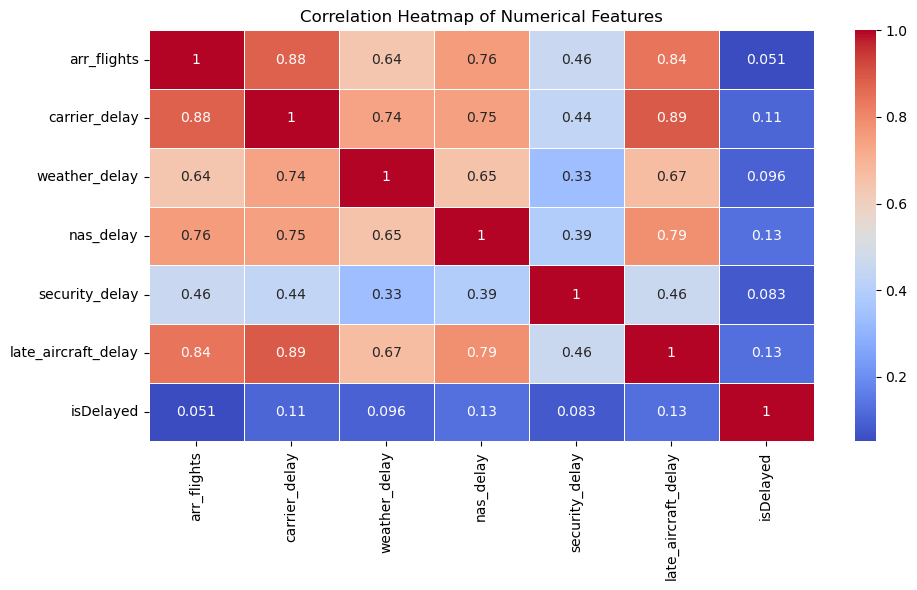

In [290]:
#Correlation Heatmap
#Select numerical features only
numerical_features = ['arr_flights', 'carrier_delay', 'weather_delay', 
                      'nas_delay', 'security_delay', 'late_aircraft_delay', 'isDelayed']

#Calculate correlation matrix
corr_matrix = df_classification[numerical_features].corr()

#Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

The correlation heatmap provides a clear visual summary of how numerical features relate to each other and to the target variable isDelayed. By displaying correlation values between variables this heatmap highlights which features are more influential for predicting delays. This variables are visualized to display highly correlated predictors and we can remove the less informative ones making it an essential step in model interpretation.

## Train Test Split

In [318]:
from sklearn.model_selection import train_test_split

#Perform train test split using test size of 20% and random state of 0
#80% train provides enough data for training to allow the model to generalize well, 
#but leaves a sufficient portion for testing to assess performance without overfitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Creating model from train data

In [320]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Predict target based on testing dataset

In [330]:
# Predict y_pred from classification model using X_test
y_pred = model.predict(X_test)

# Make a dataframe to compare y_test and y_pred side-by-side
comparison_table = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
comparison_table.head()

,y_test,y_pred
0,1,1
1,0,0
2,1,0
3,1,1
4,1,1


## Model Evaluation

In [335]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Model Evaluation
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Displaying the evaluation metrics
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))

Accuracy: 0.81
Precision: 0.83
Recall: 0.90
F1 Score: 0.86


### Confusion Matrix

In [340]:
from sklearn.metrics import confusion_matrix, classification_report

# Model Evaluation with Confusion Matrix
predictions = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)

# Displaying the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Displaying the classification report
print('Classification Report:')
print(report)

Confusion Matrix:
[[3175 1768]
 [ 921 8513]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.64      0.70      4943
           1       0.83      0.90      0.86      9434

    accuracy                           0.81     14377
   macro avg       0.80      0.77      0.78     14377
weighted avg       0.81      0.81      0.81     14377



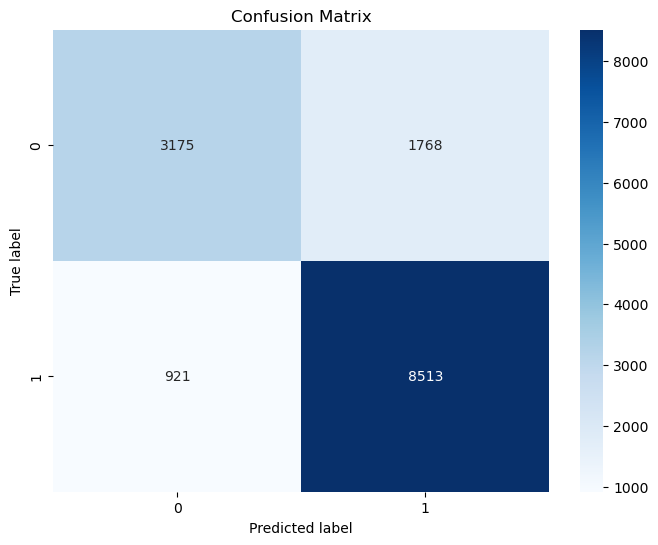

In [342]:
import seaborn as sns

# Plotting the Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

The model was evaluated using accuracy, precision, recall, and F1-score, along with a confusion matrix and a classification report to assess its performance more comprehensively. 
1. Accuracy (0.81) means that the model correctly classified 81% of all test samples. 
2. Precision (0.83) for the positive class (isDelayed = 1) indicates that 83% of the flights predicted as delayed were actually delayed, showing good reliability when predicting delays.
3. Recall (0.90) is very high, meaning that the model successfully captured 90% of the actual delayed flights. This is important in delay prediction, where missing an actual delay could be costly.
4. F1-score (0.86) is the harmonic mean of precision and recall, showing a strong overall balance between identifying true delays and minimizing false alarms.